In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import warnings
warnings.filterwarnings('ignore')

In [50]:
da=pd.read_csv('insurance.csv')
da.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratry Data Analysis

In [51]:
da.shape

(1338, 7)

In [52]:
da.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
da.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Bivariate Analysis

<AxesSubplot:xlabel='charges', ylabel='sex'>

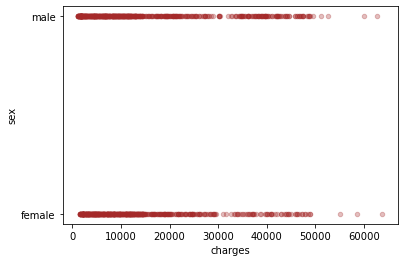

In [55]:
da.plot.scatter(y='sex',x='charges',color='brown',alpha=0.3)

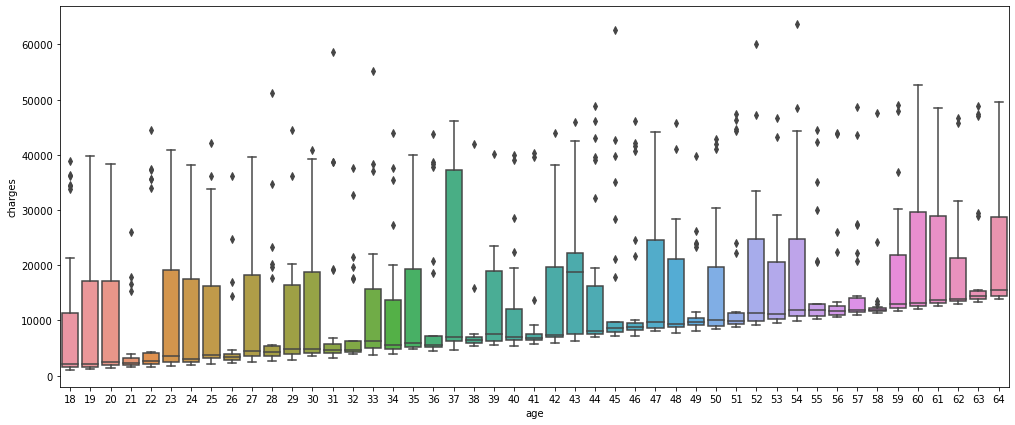

In [56]:
plt.figure(figsize=(17,7))
sns.boxplot(y='charges',x='age',data=da)
plt.show()

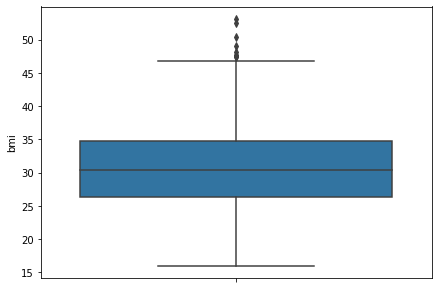

In [57]:
plt.figure(figsize=(7,5))
sns.boxplot(hue='charges',y='bmi',data=da)
plt.show()

<AxesSubplot:xlabel='children'>

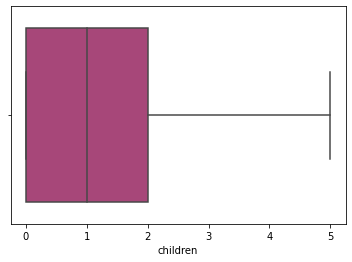

In [58]:
sns.boxplot(hue='charges',x='children',data=da,palette='magma')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

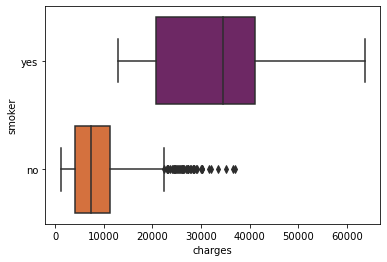

In [59]:
sns.boxplot(y='smoker',x='charges',data=da,palette='inferno')

<AxesSubplot:xlabel='charges', ylabel='region'>

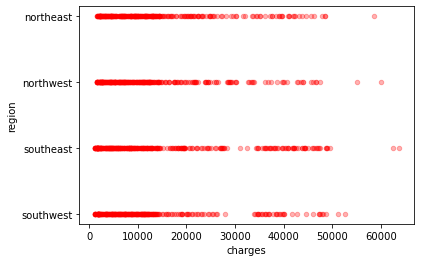

In [60]:
da.plot.scatter(y='region',x='charges',color='red',alpha=0.3)

In [61]:
da.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

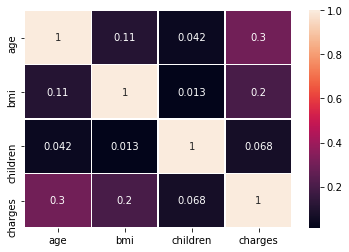

In [62]:
sns.heatmap(da.corr(),annot=True,linewidth=0.3)

# Preprocessing

In [63]:
da.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
df=da[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
sex=df['sex']
sex=pd.get_dummies(sex)
sex.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [67]:
smoker=df['smoker']
smoker=pd.get_dummies(smoker)
smoker.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [68]:
region=df['region']
region=pd.get_dummies(region)
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [69]:
df=pd.concat([df,region,smoker,sex],axis=1)

In [70]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,no,yes,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,1,0,0,1


In [71]:
df.shape

(1338, 15)

In [72]:
df.drop(['sex','smoker','region'],inplace=True,axis=1)
df.head()

,age,bmi,children,charges,northeast,northwest,southeast,southwest,no,yes,female,male
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,1


In [73]:
df.corr()

,age,bmi,children,charges,northeast,northwest,southeast,southwest,no,yes,female,male
age,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251,-0.057292,0.057292
northeast,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811,0.002425,-0.002425
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945,0.011156,-0.011156
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498,-0.017117,0.017117
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945,0.004184,-0.004184
no,0.025019,-0.003750,-0.007673,-0.787251,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000,0.076185,-0.076185
yes,-0.025019,0.003750,0.007673,0.787251,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000,-0.076185,0.076185


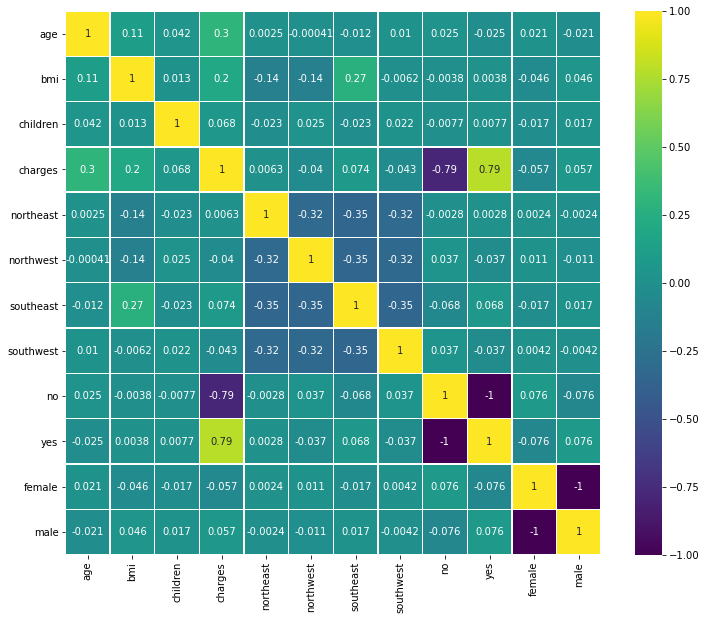

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.4,cmap='viridis')
plt.show()

# splitting the dataset

In [75]:
x = df.drop(['charges'], axis=1)
y = df['charges']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
y_pred=reg.predict(x_test)

In [82]:
reg.score(x_test,y_test)

0.8872947315824008

In [83]:
reg.score(x_train,y_train)

0.9739049902845296

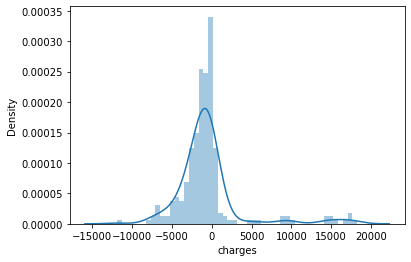

In [84]:
sns.distplot(y_test-y_pred)
plt.show()

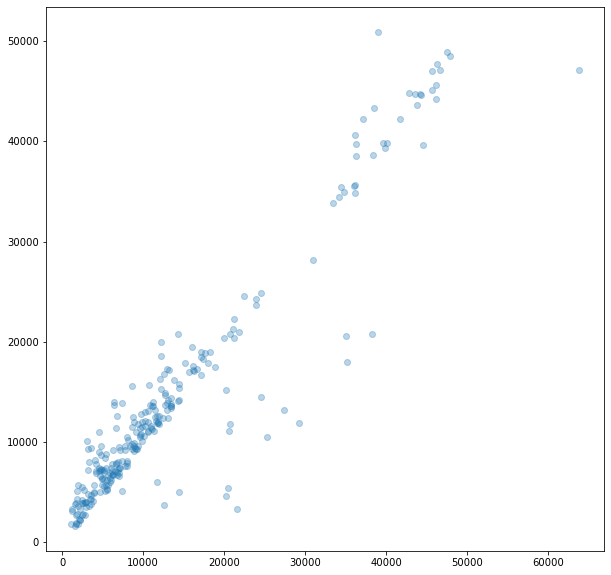

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred,alpha=0.3)
plt.show()

In [86]:
from sklearn import metrics

In [87]:
print("MAE(Mean_Absolute_Error)=\t",metrics.mean_absolute_error(y_test,y_pred))
print("MSE(Mean_Squared_Error)=\t",metrics.mean_squared_error(y_test,y_pred))
print("RMSE(Root_Mean_Squared_Error)=\t",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE(Mean_Absolute_Error)=	 2392.7140948828974
MSE(Mean_Squared_Error)=	 17232133.927726246
RMSE(Root_Mean_Squared_Error)=	 4151.160551909098


In [88]:
metrics.r2_score(y_test,y_pred)

0.8872947315824008

# Hyperparameter Tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num =6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [91]:
# Create a random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_split}

In [92]:
rf_random = RandomizedSearchCV(estimator=reg, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42,n_jobs=1)

In [93]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=15, min_samples_split

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15, 100],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [95]:
import statsmodels.api as sm

In [97]:
prediction=rf_random.predict(x_test)

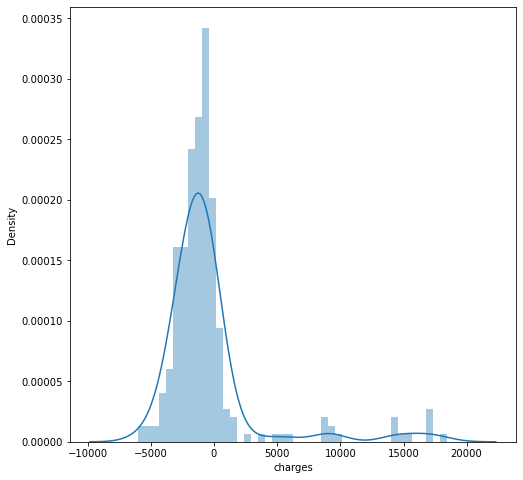

In [98]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

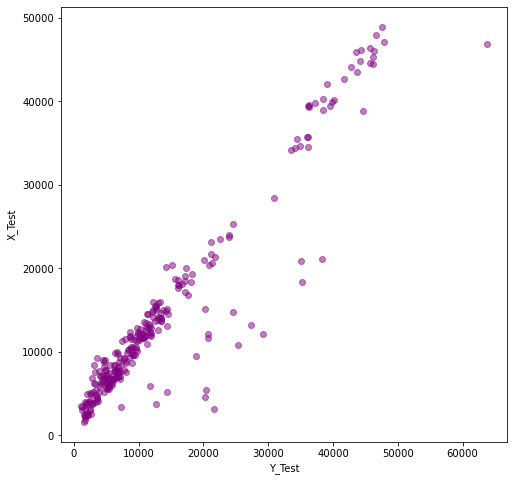

In [99]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5,color='purple')
plt.xlabel('Y_Test')
plt.ylabel('X_Test')
plt.show()

In [103]:
OLSsm_int= sm.OLS(y_test, sm.add_constant(prediction)).fit()
OLSsm_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2423.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          1.19e-135
Time:                        10:15:36   Log-Likelihood:                -2595.5
No. Observations:                 268   AIC:                             5195.
Df Residuals:                     266   BIC:                             5202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -727.4028    376.151     -1.934      0.054   -1468.014      13.209
x1             1.0201      0.021     49.228      0.000       0.979       1.061
==============================================================================
Omnibus:                      198.741   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1640.552
Skew:                           3.135   Prob(JB):                         0.00
Kurtosis:                      13.373   Cond. No.                     2.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
print("MAE(Mean_Absolute_Error)=\t",metrics.mean_absolute_error(y_test,prediction))
print("MSE(Mean_Squared_Error)=\t",metrics.mean_squared_error(y_test,prediction))
print("RMSE(Root_Mean_Squared_Error)=\t",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE(Mean_Absolute_Error)=	 2318.4121931530162
MSE(Mean_Squared_Error)=	 15374122.116249302
RMSE(Root_Mean_Squared_Error)=	 3920.9848400942974


In [105]:
import pickle
file= open('Insurance_Charges_Prediction.pkl','wb')

# dump information to that file
pickle.dump(rf_random,file)

In [106]:
model=open('Insurance_Charges_Prediction.pkl','rb')
forest= pickle.load(model)

In [107]:
y_prediction=forest.predict(x_test)

In [108]:
metrics.r2_score(y_test, y_prediction)

0.8994468957202761

Before Hyperparameter Tuning Accuracy was 88.43% 

After Hyperparameter Tuning Accuracy is 89.89%